In [229]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing  # imputing and scale
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.decomposition import PCA  #principal components Analysis
from sklearn.impute import KNNImputer   # missing values imputation
from pandas.plotting import scatter_matrix  #scatter matrix correlation , scatter
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt1
from sklearn.cluster import KMeans  # clustering
from sklearn.metrics import silhouette_score #evaluation metric for # of clusters
from sklearn.naive_bayes import MultinomialNB  #naive bayes
pd.set_option('display.max_columns', 100) #display more jupyter notebook
pd.set_option('display.max_rows', 100)  # display rows
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score  #preditive accuracy
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score  #recall
from sklearn.metrics import auc  #area under curve
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import log_loss  #log loss
from sklearn.metrics import f1_score  #f1 score
from sklearn.metrics import roc_curve #plot roc curve
from sklearn.metrics import precision_recall_curve  # plot precision recall
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV, LassoCV, BayesianRidge,ElasticNet,ElasticNetCV
import itertools 
from sklearn.metrics import mean_squared_error   #RMSE
from sklearn.metrics import mean_absolute_error  #MAE/MAD
from sklearn.neighbors import KNeighborsRegressor  #classification algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from dmba import plotDecisionTree  #pip install dmba
#dmba is dependent on pydotplus and graphviz
#conda install graphviz
#conda install -c conda-forge pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
#import graphviz


#from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
#from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
#from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
#from dmba import plotDecisionTree
#import pydotplus
#from yellowbrick.datasets import load_concrete
#from yellowbrick.regressor import PredictionError
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as pl


In [285]:
df = pd.read_csv('output.csv')
df.head()

,CustomerId,AppointmentID,Cust Age,Cust Gender,Build Year,Vehicle Age,Vehicle Type,Vehicle OEM,Appointment Day,AppointmentDay,ScheduledDate,ScheduledDay,SMS_received,Reminder received,Issue Arena,Issue Criticality,Issue Severity,Last Serviced date,Techinician assigned,New Issue,No-show
0,1563014,6149830,25,Male,2002,20,Hatchback,BMW,09/17/2022,Saturday,10-03-2022 8:25,Monday,False,False,Replace rear brakes,10,10,10-03-2022,False,False,False
1,4065606,6707205,52,Male,2017,5,Minivan,GMC,05/18/2022,Wednesday,06-04-2022 2:30,Saturday,False,False,Battery Maintenance Service,2,3,06-04-2022,False,False,False
2,811817,5568312,27,Male,2006,16,Wagon,Nissan,06/11/2022,Saturday,06-30-2022 6:40,Thursday,False,False,Install Premium Fuel Treatment,2,1,06-30-2022,True,False,False
3,3737986,8797591,26,Male,2007,15,SUV,BMW,08/25/2022,Thursday,09-09-2022 3:25,Friday,True,False,Install Nitrogen into all Tires,2,2,09-09-2022,False,True,True
4,697291,3057583,26,Male,2009,13,Hatchback,FIAT,07/12/2022,Tuesday,07-12-2022 8:50,Tuesday,False,True,Replace cabin air filter,5,2,07-12-2022,True,False,False


In [231]:
df.shape

(300156, 21)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300156 entries, 0 to 300155
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CustomerId            300156 non-null  int64 
 1   AppointmentID         300156 non-null  int64 
 2   Cust Age              300156 non-null  int64 
 3   Cust Gender           300156 non-null  object
 4   Build Year            300156 non-null  int64 
 5   Vehicle Age           300156 non-null  int64 
 6   Vehicle Type          300156 non-null  object
 7   Vehicle OEM           300156 non-null  object
 8   Appointment Day       300156 non-null  object
 9   AppointmentDay        300156 non-null  object
 10  ScheduledDate         300156 non-null  object
 11  ScheduledDay          300156 non-null  object
 12  SMS_received          300156 non-null  bool  
 13  Reminder received     300156 non-null  bool  
 14  Issue Arena           300156 non-null  object
 15  Issue Criticality

In [287]:
df['CustomerId'].duplicated().any()

True

In [288]:
df['AppointmentID'].duplicated().any()

True

# Data Exploration
===========================================

# Exploring the shape of the data

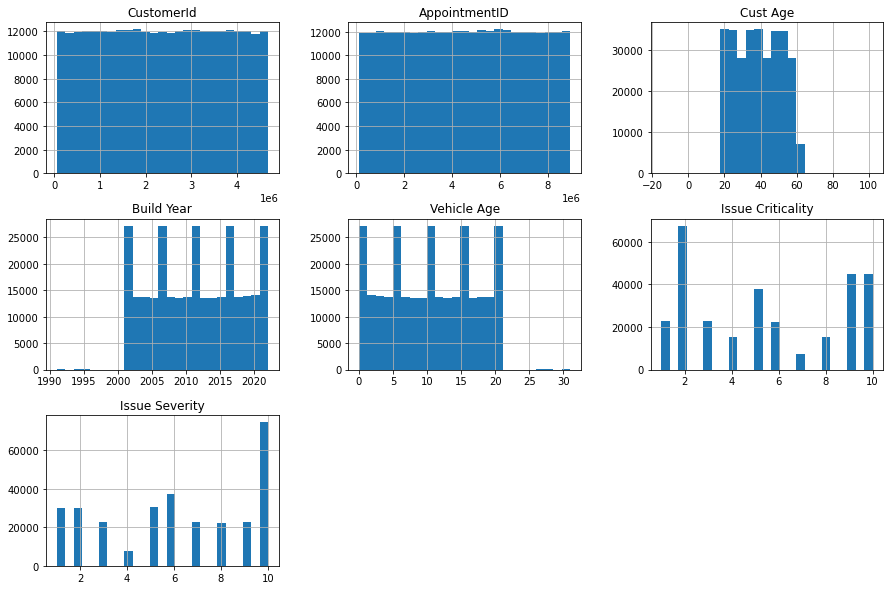

In [233]:
df.hist(bins=25,figsize=(15,10))
plt.show()

# Observations


# Bar Plot

1) Exploring how the data is categorized into Show and No-Show

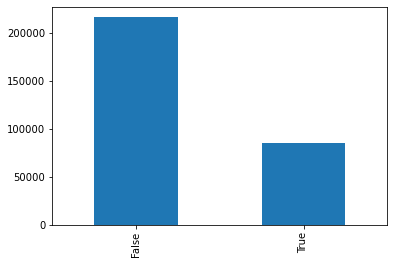

In [234]:
df['No-show'].value_counts().plot(kind='bar');

2) Checking how the data is grouped into different quality

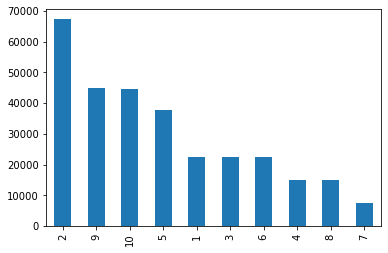

In [235]:
df['Issue Criticality'].value_counts().plot(kind='bar');


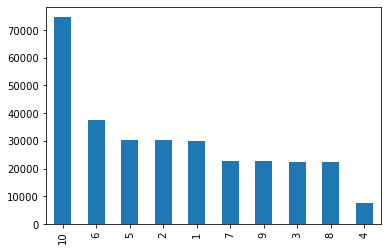

In [236]:
df['Issue Severity'].value_counts().plot(kind='bar');

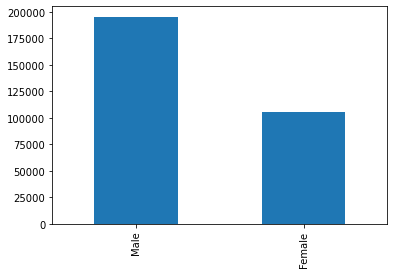

In [237]:
df['Cust Gender'].value_counts().plot(kind='bar');

In [238]:
df['Cust Gender'].replace('Female', 0,inplace=True)
df['Cust Gender'].replace('Male', 1,inplace=True)
df[['AppointmentDay']] = df[['AppointmentDay']].replace(dict.fromkeys(['Monday','Tuesday','Wednesday','Thursday','Friday'], 'Weekday'))
df[['AppointmentDay']] = df[['AppointmentDay']].replace(dict.fromkeys(['Saturday','Sunday'], 'Weekend'))
df[['ScheduledDay']] = df[['ScheduledDay']].replace(dict.fromkeys(['Monday','Tuesday','Wednesday','Thursday','Friday'], 'Weekday'))
df[['ScheduledDay']] = df[['ScheduledDay']].replace(dict.fromkeys(['Saturday','Sunday'], 'Weekend'))


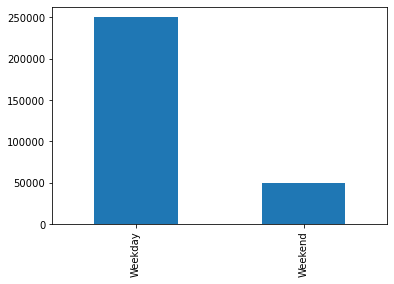

In [239]:
df['ScheduledDay'].value_counts().plot(kind='bar');

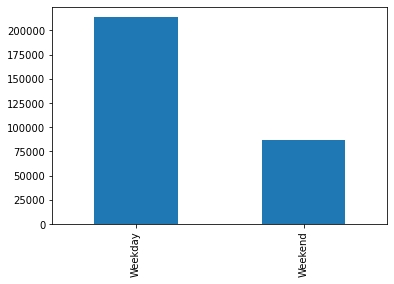

In [240]:
df['AppointmentDay'].value_counts().plot(kind='bar');

In [241]:
# statistacal breakdown of the dataframe
df.describe()

,CustomerId,AppointmentID,Cust Age,Cust Gender,Build Year,Vehicle Age,Issue Criticality,Issue Severity
count,3.001560e+05,3.001560e+05,300156.000000,300156.000000,300156.000000,300156.000000,300156.000000,300156.000000
mean,2.364427e+06,4.523649e+06,38.979367,0.650462,2011.513373,10.486627,5.442547,6.169129
std,1.336636e+06,2.545954e+06,12.420099,0.476825,6.349487,6.349487,3.182504,3.159153
min,4.741100e+04,1.041750e+05,-15.000000,0.000000,1991.000000,0.000000,1.000000,1.000000
25%,1.208191e+06,2.318808e+06,28.000000,0.000000,2006.000000,5.000000,2.000000,3.000000
50%,2.363834e+06,4.530523e+06,39.000000,1.000000,2012.000000,10.000000,5.000000,6.000000
75%,3.521777e+06,6.721646e+06,50.000000,1.000000,2017.000000,16.000000,9.000000,9.000000
max,4.679972e+06,8.933471e+06,102.000000,1.000000,2022.000000,31.000000,10.000000,10.000000


The min of the Age column is a negative number. This is a validity error as age cannot be in negatives.

Data quality issues

Negative age
Misspelled column labels
Wrong data types for some columns

# Check for missing values

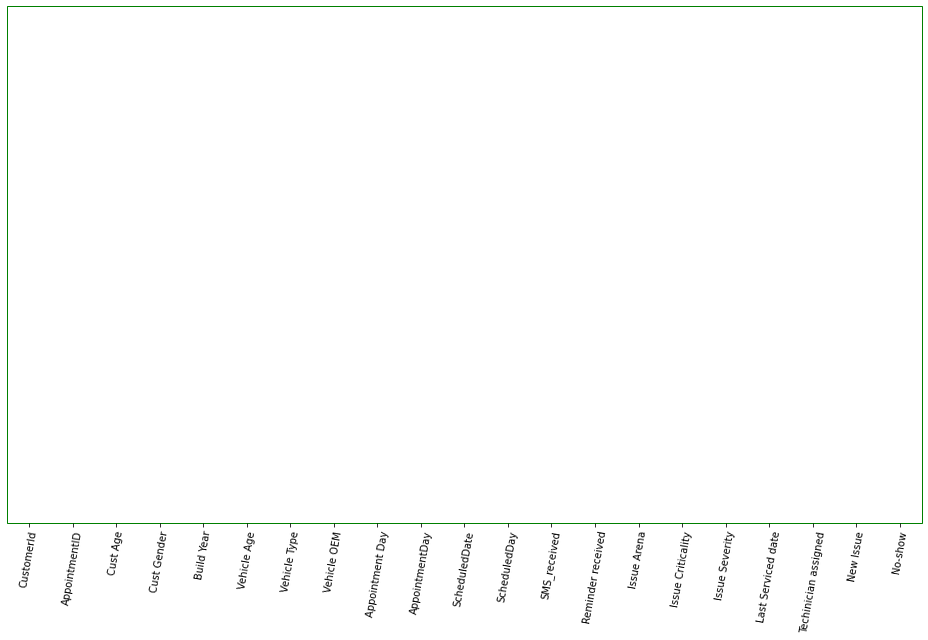

In [242]:
#Explore the data for missing values including using the Figure  heatmap. 
#Replace the missing value(s) with an imputed value(s) and create an indicator variable as such. 


naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "red"], cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1, 
                     edgecolor='green',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [243]:
df.isnull().sum()

CustomerId              0
AppointmentID           0
Cust Age                0
Cust Gender             0
Build Year              0
Vehicle Age             0
Vehicle Type            0
Vehicle OEM             0
Appointment Day         0
AppointmentDay          0
ScheduledDate           0
ScheduledDay            0
SMS_received            0
Reminder received       0
Issue Arena             0
Issue Criticality       0
Issue Severity          0
Last Serviced date      0
Techinician assigned    0
New Issue               0
No-show                 0
dtype: int64

In [244]:
#remove columns where every instance has the same value
#remove columns that may be duplicates
#remove columns where dummy/indicators are 1 or 2 instances only
#drop misc columns that appear redundant 

In [245]:
def constant_variance(df):
    constant=[]
    for col in df.columns:
        if df[col].dtype!='object':
            if df[col].std()==0:
                constant.append(col)
    return constant

def leave_one_two_out(df):
    leave=[]
    for col in df.columns:
        if np.logical_or(df[col].sum()==1,df[col].sum()==2)==True:
            leave.append(col)
    return leave

def duplicate_col(df):
    dupecol = []
    c = df.columns
    for i in range(len(c)-1):
        v = df[c[i]].values
        for j in range(i+1,len(c)):
            if np.array_equal(v,df[c[j]].values):
                dupecol.append(c[j])
    return dupecol



drop_list=list(set(constant_variance(df)+leave_one_two_out(df)+duplicate_col(df)))

df=df.drop(drop_list,axis=1)


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300156 entries, 0 to 300155
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CustomerId            300156 non-null  int64 
 1   AppointmentID         300156 non-null  int64 
 2   Cust Age              300156 non-null  int64 
 3   Cust Gender           300156 non-null  int64 
 4   Build Year            300156 non-null  int64 
 5   Vehicle Age           300156 non-null  int64 
 6   Vehicle Type          300156 non-null  object
 7   Vehicle OEM           300156 non-null  object
 8   Appointment Day       300156 non-null  object
 9   AppointmentDay        300156 non-null  object
 10  ScheduledDate         300156 non-null  object
 11  ScheduledDay          300156 non-null  object
 12  SMS_received          300156 non-null  bool  
 13  Reminder received     300156 non-null  bool  
 14  Issue Arena           300156 non-null  object
 15  Issue Criticality

In [247]:

# changing object columns to category
columns = ['Vehicle Type','Vehicle OEM','AppointmentDay','ScheduledDay','Issue Arena','Issue Criticality','Issue Severity']
for column in columns:
    df[column] = df[column].astype('category')
    
#changing dtype of ID columns to string
df['CustomerId'] = df['CustomerId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)       

In [248]:
#changing the datatype of two columns
#df['Appointment Day'] = pd.to_datetime(df['Appointment Day'])
#df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])

In [249]:
#Exploring the data for outliers. If we deem the outlier as a data error,will impute accordingly 
#and create an indicator variable as such.
df.describe()

,Cust Age,Cust Gender,Build Year,Vehicle Age
count,300156.000000,300156.000000,300156.000000,300156.000000
mean,38.979367,0.650462,2011.513373,10.486627
std,12.420099,0.476825,6.349487,6.349487
min,-15.000000,0.000000,1991.000000,0.000000
25%,28.000000,0.000000,2006.000000,5.000000
50%,39.000000,1.000000,2012.000000,10.000000
75%,50.000000,1.000000,2017.000000,16.000000
max,102.000000,1.000000,2022.000000,31.000000


In [250]:
#Cleaning up the column names
#renaming columns
df.rename(columns =  {'Cust Age':'CustAge',
                            'Cust Gender':'CustGender',
                            'Build Year':  'BuildYear',        
                            'Vehicle Age' : 'VehicleAge',         
                            'Vehicle Type' : 'VehicleType',        
                            'Vehicle OEM' :   'VehicleOEM',         
                            'Appointment Day' : 'Appointment_Date',       
                            'SMS_received' :  'SMSReceived',        
                            'Reminder received' : 'ReminderReceived',     
                            'Issue Arena' :    'IssueArena',       
                            'Issue Criticality':  'IssueCriticality',   
                            'Issue Severity':  'IssueSeverity',      
                            'Techinician assigned':   'TechinicianAssigned' ,
                            'New Issue':  'NewIssue' ,           
                            'No-show': 'NoShow'        
                           },
                           inplace = True)

# Checking the data for any outliers

Clearly we have outliers in the data. <br>
Now let's look into the data for each column and replace them in the steps below

In [251]:
#checking index of row with negative age value
print(df.query('CustAge > 100 or CustAge <0'))

       CustomerId AppointmentID  CustAge  CustGender  BuildYear  VehicleAge  \
14976     3346584       5703549       -7           1       2006          16   
29975     3945837       8859213       -4           1       2016           6   
60024     4495422       6009911       -7           1       1991          31   
75032     1243965       3476310      -15           1       2003          19   
90070     1198472       1178923       -7           1       2022           0   
105120    3465233       3101158       -4           1       2004          18   
135108    3286527       6606859      -15           1       2020           2   
150135    1756497       1574377       -7           1       2020           2   
165150    1303946       1959016      -15           1       2019           3   
180066    3145052        421372      102           1       1995          27   
240153     869599       1400984      102           1       1994          28   
255132    2134081       8649884       -4           1

In [252]:
#Mean of the columns for outliers imputing
df['CustAge'].mean()

38.97936739562094

# Treating the outliers with its mean

In [253]:
#chk if we can add any other method to treat the outliers

for x in [-15,0]:
    df['CustAge']=np.where(df['CustAge']== x,8.97936739562094,df['CustAge'])


In [254]:
#Mean of the columns for outliers imputing
df['CustAge']=np.where(df['CustAge'] >= 100 ,df['CustAge'].mean(),df['CustAge'])
#Mean of the columns for outliers imputing
df['CustAge']=np.where(df['CustAge'] < 0 ,df['CustAge'].mean(),df['CustAge'])

In [255]:
#checking index of row with negative age value
print(df.query('CustAge > 100 or CustAge <0'))

Empty DataFrame
Columns: [CustomerId, AppointmentID, CustAge, CustGender, BuildYear, VehicleAge, VehicleType, VehicleOEM, Appointment_Date, AppointmentDay, ScheduledDate, ScheduledDay, SMSReceived, ReminderReceived, IssueArena, IssueCriticality, IssueSeverity, Last Serviced date, TechinicianAssigned, NewIssue, NoShow]
Index: []


In [256]:
#checking index of row with negative age value
print(df.query('CustAge < 0'))

Empty DataFrame
Columns: [CustomerId, AppointmentID, CustAge, CustGender, BuildYear, VehicleAge, VehicleType, VehicleOEM, Appointment_Date, AppointmentDay, ScheduledDate, ScheduledDay, SMSReceived, ReminderReceived, IssueArena, IssueCriticality, IssueSeverity, Last Serviced date, TechinicianAssigned, NewIssue, NoShow]
Index: []


In [257]:
#checking index of row with negative age value
print(df.query('VehicleAge < 0'))

Empty DataFrame
Columns: [CustomerId, AppointmentID, CustAge, CustGender, BuildYear, VehicleAge, VehicleType, VehicleOEM, Appointment_Date, AppointmentDay, ScheduledDate, ScheduledDay, SMSReceived, ReminderReceived, IssueArena, IssueCriticality, IssueSeverity, Last Serviced date, TechinicianAssigned, NewIssue, NoShow]
Index: []


False    215669
True      84487
Name: NoShow, dtype: int64


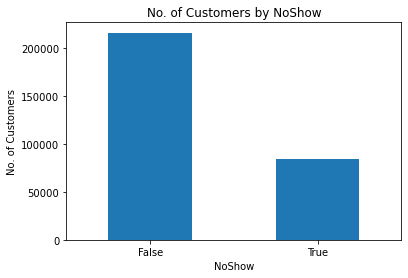

In [258]:
print(df['NoShow'].value_counts())
#plotting distribution of show and no show 
ax = df['NoShow'].value_counts().plot(
        kind='bar',
        title = 'No. of Customers by NoShow',
        rot=0)
ax.set_xlabel('NoShow')
ax.set_ylabel('No. of Customers');

1    195240
0    104916
Name: CustGender, dtype: int64


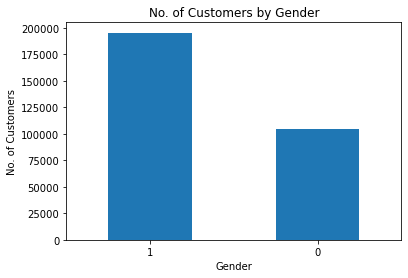

In [259]:
#checking distribution of gender in the patients
print(df['CustGender'].value_counts())
#plotting distribution of Gender on a histogram
ax = df['CustGender'].value_counts().plot(
        kind='bar',
        title = 'No. of Customers by Gender',
        rot=0)
ax.set_xlabel('Gender')
ax.set_ylabel('No. of Customers');

In [260]:
#calculating percentage of female patients 
f_percent = (df.query('CustGender == 0').count().CustGender/ df['CustGender'].count())*100
print("percentage of female customers "+str(f_percent))
#calculating percentage of male patients 
m_percent = (df.query('CustGender == 1').count().CustGender/df['CustGender'].count())*100
print("percentage of male customers "+str(m_percent))

percentage of female customers 34.953824011514016
percentage of male customers 65.04617598848598


In [261]:
# pivot table with gender and no-show column 
df_ns = df.groupby(['NoShow','CustGender'],as_index=False).size()
ns_pivot = pd.pivot_table(df_ns, values = 'size',columns=['NoShow'],index='CustGender')
ns_pivot

NoShow,False,True
CustGender,,
0,75426,29490
1,140243,54997


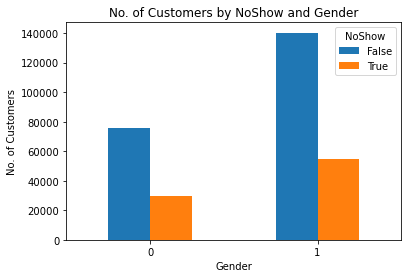

In [262]:
# visualizing the pivot table 
ax = ns_pivot.plot(
        kind='bar',
        title = 'No. of Customers by NoShow and Gender',
        rot=0)
ax.set_xlabel('Gender')
ax.set_ylabel('No. of Customers');

In [263]:
# number of females who showed
f_show_count = df.query('CustGender == 0 & NoShow == False ').count().CustGender
print('Number of females who showed: ' + str(f_show_count))
# number of females who did not show
f_noshow_count = df.query('CustGender == 0 & NoShow == True').count().CustGender
print('Number of females who did not show: ' + str(f_noshow_count))
# number of males who showed
m_show_count = df.query('CustGender == 1 & NoShow == False').count().CustGender
print('Number of males who showed: ' + str(m_show_count))
# number of females who did not show
m_noshow_count = df.query('CustGender == 1 & NoShow == True').count().CustGender
print('Number of females who did not show: ' + str(m_noshow_count))




Number of females who showed: 75426
Number of females who did not show: 29490
Number of males who showed: 140243
Number of females who did not show: 54997


In [264]:
#creating a function for calculating percentages
def percentage(value,total):
    var_percent = (sample/total)*100
    return var_percent
# creating a probability function
def probability(outcome,total):
    prob = (outcome/total)
    return prob

In [265]:
# probability of a female showing
f_show_prob = probability(f_show_count,df.query('CustGender == 0').count().CustGender)
# rounding to two decimal places 
round(f_show_prob,2)
print('The probaility of a female showing up for their appointment  ' + str(f_show_prob))


# probability of a male showing
m_show_prob = probability(m_show_count,df.query('CustGender == 1').count().CustGender)
# rounding to two decimal places 
round(m_show_prob,2)
print('The probaility of a male showing up for their appointment  ' + str(m_show_prob))

The probaility of a female showing up for their appointment  0.718917991536086
The probaility of a male showing up for their appointment  0.7183107969678345


In [266]:
#creating a pivot table for Scholarship and NoShow
df_ad = df.groupby(['NoShow','AppointmentDay'],as_index=False).size()
ad_pivot = pd.pivot_table(df_ad, values = 'size',columns=['NoShow'],index='AppointmentDay')
ad_pivot

NoShow,False,True
AppointmentDay,,
Weekday,153712,60151
Weekend,61957,24336


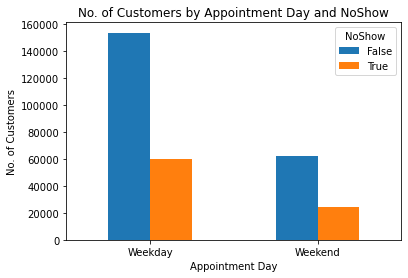

In [267]:
#plotting the pivot table on a grouped bar chart
ax = ad_pivot.plot(
        kind='bar',
        title = 'No. of Customers by Appointment Day and NoShow',
        rot=0)
ax.set_xlabel('Appointment Day')
ax.set_ylabel('No. of Customers');

In [268]:
#creating a pivot table for Scholarship and NoShow
df_sd = df.groupby(['NoShow','ScheduledDay'],as_index=False).size()
sd_pivot = pd.pivot_table(df_sd, values = 'size',columns=['NoShow'],index='ScheduledDay')
sd_pivot

NoShow,False,True
ScheduledDay,,
Weekday,180093,70503
Weekend,35576,13984


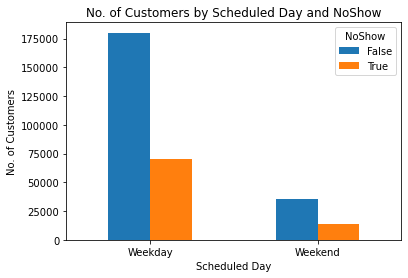

In [269]:
#plotting the pivot table on a grouped bar chart
ax = sd_pivot.plot(
        kind='bar',
        title = 'No. of Customers by Scheduled Day and NoShow',
        rot=0)
ax.set_xlabel('Scheduled Day')
ax.set_ylabel('No. of Customers');

The graph shows that for weekday and weekend majority of the patients showed up. We will compute the probabilities to draw a more statistical conclusion.

In [270]:
# variable for  
sd_weekday_show_count = df.query('ScheduledDay == "Weekday" and NoShow==False').count().ScheduledDay
print('Number of Customers show on Scheduled Weekday: ' + str(sd_weekday_show_count))
# variable for 
sd_weekday_noshow_count = df.query('ScheduledDay == "Weekday" and NoShow==True').count().ScheduledDay
print('Number of Customers no show on Scheduled Weekday: ' + str(sd_weekday_noshow_count))
# variable for  
sd_weekend_show_count = df.query('ScheduledDay == "Weekend" and NoShow==False').count().ScheduledDay
print('Number of Customers show on Scheduled weekend: ' + str(sd_weekend_show_count))
# variable for 
sd_weekend_noshow_count = df.query('ScheduledDay == "Weekend" and NoShow==True').count().ScheduledDay
print('Number of Customers no show on Scheduled Weekend: ' + str(sd_weekend_noshow_count))

Number of Customers show on Scheduled Weekday: 180093
Number of Customers no show on Scheduled Weekday: 70503
Number of Customers show on Scheduled weekend: 35576
Number of Customers no show on Scheduled Weekend: 13984


In [271]:
# probability of a customers showing up on scheduled weekday
sd_wd_show_prob = probability(sd_weekday_show_count,df.query('ScheduledDay == "Weekday"').count().ScheduledDay)
print (round(sd_wd_show_prob,2))

# probability of a customers showing up on scheduled weekend
sd_we_show_prob = probability(sd_weekend_show_count,df.query('ScheduledDay == "Weekend"').count().ScheduledDay)
print(round(sd_we_show_prob,2))

0.72
0.72


In [279]:
# variable for  
ad_weekday_show_count = df.query('AppointmentDay == "Weekday" and NoShow==False').count().AppointmentDay
print('Number of Customers show on Appointment at Weekday: ' + str(ad_weekday_show_count))
# variable for 
ad_weekday_noshow_count = df.query('AppointmentDay == "Weekday" and NoShow==True').count().AppointmentDay
print('Number of Customers no show on Appointment at Weekday: ' + str(ad_weekday_noshow_count))
# variable for  
ad_weekend_show_count = df.query('AppointmentDay == "Weekend" and NoShow==False').count().AppointmentDay
print('Number of Customers show on Appointment at weekend: ' + str(ad_weekend_show_count))
# variable for 
ad_weekend_noshow_count = df.query('AppointmentDay == "Weekend" and NoShow==True').count().AppointmentDay
print('Number of Customers no show on Appointment at Weekend: ' + str(ad_weekend_noshow_count))

Number of Customers show on Appointment at Weekday: 153712
Number of Customers no show on Appointment at Weekday: 60151
Number of Customers show on Appointment at weekend: 61957
Number of Customers no show on Appointment at Weekend: 24336


In [280]:
# probability of a customers showing up on Appointment at  weekday
ad_wd_show_prob = probability(ad_weekday_show_count,df.query('AppointmentDay == "Weekday"').count().AppointmentDay)
print (round(ad_wd_show_prob,2))

# probability of a customers showing up on Appointment at  weekend
ad_we_show_prob = probability(ad_weekend_show_count,df.query('AppointmentDay == "Weekend"').count().AppointmentDay)
print(round(ad_we_show_prob,2))

0.72
0.72


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300156 entries, 0 to 300155
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   CustomerId           300156 non-null  object  
 1   AppointmentID        300156 non-null  object  
 2   CustAge              300156 non-null  float64 
 3   CustGender           300156 non-null  int64   
 4   VehicleAge           300156 non-null  int64   
 5   VehicleType          300156 non-null  category
 6   VehicleOEM           300156 non-null  category
 7   Appointment_Date     300156 non-null  object  
 8   AppointmentDay       300156 non-null  category
 9   ScheduledDate        300156 non-null  object  
 10  ScheduledDay         300156 non-null  category
 11  SMSReceived          300156 non-null  bool    
 12  ReminderReceived     300156 non-null  bool    
 13  IssueArena           300156 non-null  category
 14  IssueCriticality     300156 non-null  category
 15  

# Correlation Plot

<AxesSubplot:>

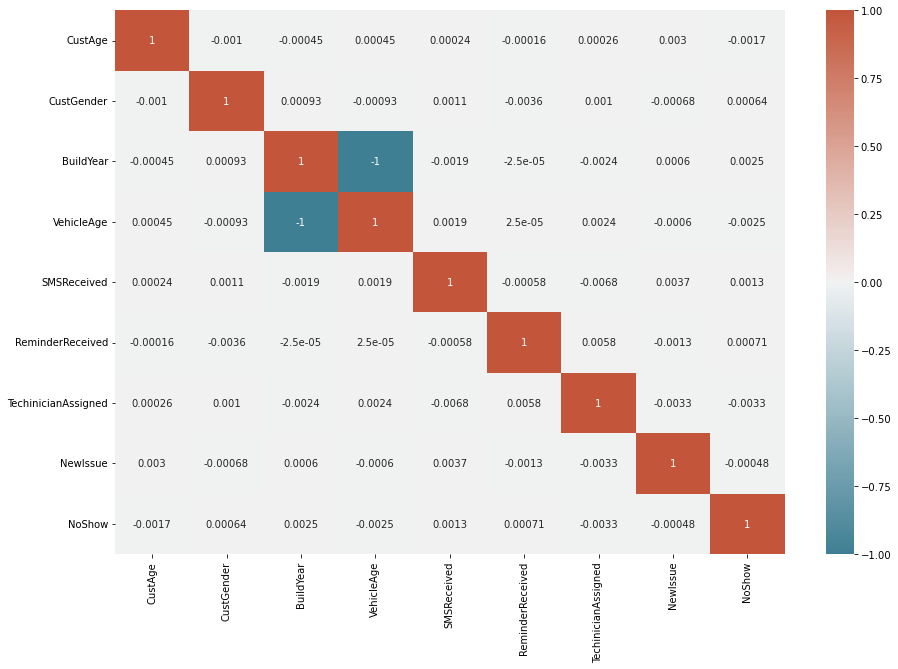

In [273]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [284]:
print(df[['IssueCriticality','IssueSeverity']].corr())
print(df[['BuildYear','VehicleAge']].corr())

Empty DataFrame
Columns: []
Index: []


 - BuildYear and VehicleAge are highly correlated when compared to the other columns.
 - We could drop one of them.

In [275]:
df=df.drop(['BuildYear'],axis=1)

In [276]:
bins = [15,30,50,70,85]
category = ["15-30","30-50","50-70","70-85"]
df['Customer_Age_bin'] = pd.cut(df['CustAge'], bins, labels=category)
df

,CustomerId,AppointmentID,CustAge,CustGender,VehicleAge,VehicleType,VehicleOEM,Appointment_Date,AppointmentDay,ScheduledDate,ScheduledDay,SMSReceived,ReminderReceived,IssueArena,IssueCriticality,IssueSeverity,Last Serviced date,TechinicianAssigned,NewIssue,NoShow,Customer_Age_bin
0,1563014,6149830,25.0,1,20,Hatchback,BMW,09/17/2022,Weekend,10-03-2022 8:25,Weekday,False,False,Replace rear brakes,10,10,10-03-2022,False,False,False,15-30
1,4065606,6707205,52.0,1,5,Minivan,GMC,05/18/2022,Weekday,06-04-2022 2:30,Weekend,False,False,Battery Maintenance Service,2,3,06-04-2022,False,False,False,50-70
2,811817,5568312,27.0,1,16,Wagon,Nissan,06/11/2022,Weekend,06-30-2022 6:40,Weekday,False,False,Install Premium Fuel Treatment,2,1,06-30-2022,True,False,False,15-30
3,3737986,8797591,26.0,1,15,SUV,BMW,08/25/2022,Weekday,09-09-2022 3:25,Weekday,True,False,Install Nitrogen into all Tires,2,2,09-09-2022,False,True,True,15-30
4,697291,3057583,26.0,1,13,Hatchback,FIAT,07/12/2022,Weekday,07-12-2022 8:50,Weekday,False,True,Replace cabin air filter,5,2,07-12-2022,True,False,False,15-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300151,1616980,770936,54.0,1,7,Coupe,Aston Martin,02/09/2022,Weekday,02-19-2022 1:35,Weekend,False,False,Throttle Body Service,2,1,02-19-2022,True,True,False,50-70
300152,254235,2497209,22.0,0,20,Hatchback,Nissan,05/02/2022,Weekday,05-16-2022 2:5,Weekday,True,True,Headlamp restoration,6,9,05-16-2022,True,True,False,15-30
300153,2804801,4356314,31.0,0,10,SUV,INFINITI,05/14/2022,Weekend,05-18-2022 8:55,Weekday,False,False,Perform Cabin Air Filter Vent Cleaning Service,1,2,05-18-2022,False,False,False,30-50
300154,335380,3183268,45.0,1,1,Hatchback,Hyundai,07/13/2022,Weekday,07-30-2022 8:5,Weekend,True,True,Replace Engine and Cabin Air Filters,3,4,07-30-2022,True,False,False,30-50


In [277]:
bins = [0,10,20,30,40]
category = ["0-10","10-20","20-30",">30"]
df['Vehicle_Age_bin'] = pd.cut(df['VehicleAge'], bins, labels=category)
df

,CustomerId,AppointmentID,CustAge,CustGender,VehicleAge,VehicleType,VehicleOEM,Appointment_Date,AppointmentDay,ScheduledDate,ScheduledDay,SMSReceived,ReminderReceived,IssueArena,IssueCriticality,IssueSeverity,Last Serviced date,TechinicianAssigned,NewIssue,NoShow,Customer_Age_bin,Vehicle_Age_bin
0,1563014,6149830,25.0,1,20,Hatchback,BMW,09/17/2022,Weekend,10-03-2022 8:25,Weekday,False,False,Replace rear brakes,10,10,10-03-2022,False,False,False,15-30,10-20
1,4065606,6707205,52.0,1,5,Minivan,GMC,05/18/2022,Weekday,06-04-2022 2:30,Weekend,False,False,Battery Maintenance Service,2,3,06-04-2022,False,False,False,50-70,0-10
2,811817,5568312,27.0,1,16,Wagon,Nissan,06/11/2022,Weekend,06-30-2022 6:40,Weekday,False,False,Install Premium Fuel Treatment,2,1,06-30-2022,True,False,False,15-30,10-20
3,3737986,8797591,26.0,1,15,SUV,BMW,08/25/2022,Weekday,09-09-2022 3:25,Weekday,True,False,Install Nitrogen into all Tires,2,2,09-09-2022,False,True,True,15-30,10-20
4,697291,3057583,26.0,1,13,Hatchback,FIAT,07/12/2022,Weekday,07-12-2022 8:50,Weekday,False,True,Replace cabin air filter,5,2,07-12-2022,True,False,False,15-30,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300151,1616980,770936,54.0,1,7,Coupe,Aston Martin,02/09/2022,Weekday,02-19-2022 1:35,Weekend,False,False,Throttle Body Service,2,1,02-19-2022,True,True,False,50-70,0-10
300152,254235,2497209,22.0,0,20,Hatchback,Nissan,05/02/2022,Weekday,05-16-2022 2:5,Weekday,True,True,Headlamp restoration,6,9,05-16-2022,True,True,False,15-30,10-20
300153,2804801,4356314,31.0,0,10,SUV,INFINITI,05/14/2022,Weekend,05-18-2022 8:55,Weekday,False,False,Perform Cabin Air Filter Vent Cleaning Service,1,2,05-18-2022,False,False,False,30-50,0-10
300154,335380,3183268,45.0,1,1,Hatchback,Hyundai,07/13/2022,Weekday,07-30-2022 8:5,Weekend,True,True,Replace Engine and Cabin Air Filters,3,4,07-30-2022,True,False,False,30-50,0-10


Consider till here for capstone.

In [278]:
#sklearn.preprocessing.MinMaxScaler
def scale_sum(df,scaler,index):
    df = pd.DataFrame(scaler.fit_transform(df)) #scaled object
    pcs = PCA()  #pca technique
    pcs.fit(df) #fit data to pca
    pcsSummary_df = pd.DataFrame({'Explained Variance': np.sqrt(pcs.explained_variance_),
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)})
    pcsSummary_df = pcsSummary_df.transpose()
    pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
    pcsSummary_df.round(4)
    
    pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),columns=pcsSummary_df.columns, index=index)
    
    scores=pd.DataFrame(pcs.fit_transform(df),columns=pcsSummary_df.columns)
    
    return pcsSummary_df, pcsComponents_df, scores  # return #1 summary of PCA, #2 components, #scores

pcsSummary_df=scale_sum(df=df.iloc[:,1:],scaler = preprocessing.MinMaxScaler(),index=df.columns[1:])[0]
pcsSummary_df

ValueError: could not convert string to float: '09/17/2022'

# Scree Plot

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pcsSummary_df[1:2].transpose())
plt.xlabel('Component')
plt.ylabel('Explained Variance in %')
plt.title('Explained Variance by Component')

In [ ]:
pcsComponents_df=scale_sum(df=df.iloc[:,1:],scaler = preprocessing.MinMaxScaler(),index=df.columns[1:])[1]
pcsComponents_df

Going by the scree plot above, we could make use of 4 PCA components

In [ ]:
pcsComponents_df[['PC1','PC2','PC3','PC4']].transpose().plot(kind='bar', stacked=True,figsize=(16, 16))

# Main features represented by the each component above:

 - PC1 mainly represents alcohol, followed by residual_sugar and total_sulphur_dioxide <br>
 - PC2 mainly represents total_sulphur_dioxide, followed by volatile acidity <br>
 - PC3 mainly represents citric_acid, followed by total_sulphur_dioxide <br>
 - PC4 mainly represents quality, followed by residual sugar <br>

In [ ]:
scores=scale_sum(df=df.iloc[:,1:],scaler = preprocessing.MinMaxScaler(),index=df.columns[1:])[2]
scores

# Scatter plot for checking natural clusters
- Let's plot first 2 components 

In [ ]:
scores.plot.scatter(x='PC1', y='PC2',figsize=(12, 12))#plot first 2 components

In [ ]:
cols=['PC1', 'PC2', 'PC3','PC4'] #list # of components I want to use

silhouette=[] 
inertia=[]
clusters=[]
for i in range(2,40):  #2=2 clusters, use enough to where we see declining silhouette and/or flattening of inertia
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scores[cols])
    silhouette.append(silhouette_score(scores[cols],kmeans.labels_)) #silhoustte
    inertia.append(kmeans.inertia_)
    clusters.append(i)

In [ ]:
kmeans_eval=pd.DataFrame({'silhouette_score': silhouette,'inertia': inertia,},index=clusters) #put dilhouette and inertia in df
kmeans_eval  #index # clusters, silhouette_score is the score for that many clusters

In [ ]:
kmeans_eval['inertia'].plot(figsize=(12, 12))#use elbow method of finding # of components to cluster
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot Inertia')

In [ ]:
kmeans_eval['silhouette_score'].plot(figsize=(12, 12)) #plot silhouete_score, visually look for highest value and corresponding cluster
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score by # of clusters')
#print(kmeans_eval['silhouette_score'])

In [ ]:
kmeans= KMeans(n_clusters=4).fit(scores[cols]) #kmeans number of clusters is subjective (unsupervised)
scores['cluster']=kmeans.labels_   #kmeans
scores['quality']=df['quality']


groups = scores.groupby('cluster') #grouping subplots

df['cluster']=scores['cluster']  #add the cluster to primary df

ax = scores.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))


#points = scores[['PC1','PC2']]

#texts = [] #adjust text
#for _, (x, y, s) in points.iterrows():#adjust text
#        texts.append(ax.text(x, y, s))#adjust text
#adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='r', alpha=0.5))#adjust text


for name, group in groups:  #grouping subplots
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() #grouping subplots

In [ ]:
kmeans= KMeans(n_clusters=3).fit(scores[cols]) #kmeans number of clusters is subjective (unsupervised)
scores['cluster']=kmeans.labels_   #kmeans


groups = scores.groupby('cluster') #grouping subplots

df['cluster']=scores['cluster']  #add the cluster to primary df

ax = scores.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))
points = scores[['PC1','PC2','quality']]

_ = points.apply(lambda x:   ax.text(*x, rotation=20, horizontalalignment='left',
                                     verticalalignment='bottom', fontsize=8), axis=1)



#texts = [] #adjust text
#for _, (x, y, s) in points.iterrows():#adjust text
#        texts.append(ax.text(x, y, s))#adjust text
#adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='r', alpha=0.5))#adjust text


for name, group in groups:  #grouping subplots
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() #grouping subplots



In [ ]:
df

In [ ]:
df_new= df

In [ ]:

X = df_new.drop(columns=['quality'])
y = df_new['quality']

In [ ]:
y.value_counts()

In [ ]:
#class imbalance#
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
#transform the dataset
X, y = oversample.fit_resample(X, y) 

In [ ]:
y.value_counts()

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state= 42)
    #train the model
    model.fit(x_train, y_train)
    print("Accuracy: " ,model.score(x_test, y_test)* 100)
    #cross- validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV score: ", np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model, X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model, X, y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
classify(model, X, y)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
classify(model, X, y)

# Standardization

1) Standard Scaler

In [ ]:
df.info()

In [ ]:
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
        'total_sulfur_dioxide',
       'pH', 'sulphates', 'alcohol']

scaler = preprocessing.StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df[cols]), index=df.index, columns=cols)
df_std

2) Robust Scalar

In [ ]:
scaler = preprocessing.RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df[cols]), index=df.index, columns=cols)
df_robust

3) Max-Abs Scalar

In [ ]:
scaler = preprocessing.MaxAbsScaler()
df_maxabs = pd.DataFrame(scaler.fit_transform(df[cols]), index=df.index, columns=cols)
df_maxabs

4) Min-Max Scalar

In [ ]:
scaler = preprocessing.MinMaxScaler()
df_min_max = pd.DataFrame(scaler.fit_transform(df[cols]), index=df.index, columns=cols)
df_min_max

# 1) k-NN Classifier

# Split the data into training and validation set

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(df_min_max,df['quality'], test_size=0.4, random_state=26)

print(train_X.shape)
print(valid_X.shape)
print(train_y.shape)
print(valid_y.shape)

# Applying k-NN model 

In [ ]:
# Train a classifier for different values of k

results = []
for k in range(1, 10):  #  interate 1 to 5 k
        knn = KNeighborsRegressor(n_neighbors=k,n_jobs=-1).fit(train_X, train_y) #model 
        results.append({
            'k': k,
            'MAE': mean_absolute_error(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='MAE')
results.index=results.k
results=results.drop('k',axis=1)
results.plot()

In [ ]:
# Train a classifier for different values of k

metric_list=['euclidean','manhattan','chebyshev','minkowski',]
             
results = []
for k in range(1, 10):
    for m in metric_list:
        knn = KNeighborsRegressor(n_neighbors=k,metric=m,n_jobs=-1).fit(train_X, train_y)
        results.append({
            'k_distance': str(k)+" "+str(m),
            'MAE': mean_absolute_error(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='MAE')

In [ ]:
#when given new/unseen data for a wine , we can use this model to predict 

new_data = pd.DataFrame([{'fixed_acidity': 22.9054634, 
                        'volatile_acidity': 0.709864,
                        'citric_acid': 4.96437,
                        'residual_sugar': 19.3777777 ,
                        'total_sulfur_dioxide':76.89905 ,
                        'pH': 3.755897 ,
                        'sulphates': 90.789834 ,
                        'alcohol': 9.70092 }])
new_data

In [ ]:
#scaler = preprocessing.MinMaxScaler()

new_data_scaled=pd.DataFrame(scaler.transform(new_data), columns=new_data.columns)  #on new data, use the scaling technique used on the training data
new_data_scaled

In [ ]:
# train knn model with k=1 and metric=chebyshev
knn = KNeighborsRegressor(n_neighbors=1,metric='manhattan',n_jobs=-1)
knn.fit(train_X, train_y)

In [ ]:
knn.predict(new_data_scaled)

# RMSE

In [ ]:
"Training RMSE: "+str(mean_squared_error(train_y, knn.predict(train_X))**.5)

In [ ]:
"Validation RMSE: "+str(mean_squared_error(valid_y, knn.predict(valid_X))**.5)

# 2) Multiple Linear Regression 

In [ ]:
df_min_max

In [ ]:
y = df['quality']

train_X, temp_X, train_y, temp_y = train_test_split(df_min_max, y, test_size=0.5, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.4, random_state=1)



print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test : ', test_X.shape)

In [ ]:
model=LinearRegression()
reg = model.fit(train_X, train_y)
pred_train = reg.predict(train_X)
pred_valid = reg.predict(valid_X)
print("\nTraning data")
print('MAE/MAD: ',mean_absolute_error(train_y,pred_train))
print('MSE: ',mean_squared_error(train_y, pred_train))
print('RMSE: ',np.sqrt(mean_squared_error(train_y, pred_train)))
print("\nValidation data")
print('MAE/MAD: ',mean_absolute_error(valid_y,pred_valid))
print('MSE: ',mean_squared_error(valid_y, pred_valid))
print('RMSE: ',np.sqrt(mean_squared_error(valid_y, pred_valid)))
AA=pd.DataFrame({'Predictor': df_min_max.columns, 'coefficient': model.coef_})
print('\n',AA)
AB = pd.DataFrame({'label': df_min_max.columns, 'value': model.coef_})
AC = AB.plot.barh(x='label', y='value')


In [ ]:
def subset(s, n):
    return list(map(set, itertools.combinations(s, n)))

def data(model,train_X,train_y,valid_X,valid_y):
    low_err=600000**2
    
    for x in range(len(train_X.columns),0,-1):
        n=x
        ss=subset(train_X.columns,n)
        print("_"*50)
        print(str(len(ss))+" model(s) using "+ str(n)+ " features")
        for z in range(0,len(ss)):
            model = model
            #Traning
            reg = model.fit(train_X[ss[z]], train_y)
            pred_train = reg.predict(train_X[ss[z]])
            err_train= mean_squared_error(train_y, pred_train)
            #Validation
            pred_valid = reg.predict(valid_X[ss[z]])
            err_valid = mean_squared_error(valid_y, pred_valid)
            mae_valid = mean_absolute_error(valid_y,pred_valid) 
 
            if err_valid < low_err:
                low_err=err_valid
                low_err_features=list(ss[z])
                print("_"*50)
                print(low_err_features)
                print("RMSE train: "+str(err_train ** .5))
                print("MSE validation: "+str(low_err))
                print("RMSE validation: "+str(low_err ** .5))
                print("MAE validation: "+str(mae_valid))
                abs(valid_y-pred_valid).hist()
                plt.show()
                print("_"*50)

In [ ]:
data(model=LinearRegression(normalize=False,n_jobs=-1), train_X=train_X[cols], train_y=train_y,valid_X=valid_X[cols],valid_y=valid_y )

# Model with 7 feature have the most predictive value.

In [ ]:
data(model=LinearRegression(normalize=True,n_jobs=-1), train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )

In [ ]:
def shrink(model,train_X,train_y,valid_X,valid_y):
    model = model
    reg = model.fit(train_X, train_y)
 
    pred_train = reg.predict(train_X)
    err_train= mean_squared_error(train_y, pred_train)
    pred_valid = reg.predict(valid_X)
    err_valid = mean_squared_error(valid_y, pred_valid)
 
    print("RMSE train: "+str(err_train ** .5))
    print("RMSE validation: "+str(err_valid ** .5))
    print("Differnce: ",(err_train ** .5)-(err_valid ** .5))
    print("features: \n",train_X.columns)
    abs(valid_y-pred_valid).hist()


In [ ]:
shrink(model=Lasso(normalize=True,alpha=1), train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )

In [ ]:
shrink(model=LassoCV(normalize=True,cv=5), train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )

In [ ]:
shrink(model=Ridge(normalize=True,alpha=1), train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )

In [ ]:
shrink(model=RidgeCV(normalize=True,cv=5), train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )

# 3) Regression Trees

In [ ]:
X=df_min_max  
y=df['quality']

# partition the data into training (60%) and validiation (40%). Set random_state=1 for reproducibility of results 
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

# - Overfitting tree

In [ ]:
# setting random state will ensure that the same tree is produced every time
deepTree = DecisionTreeRegressor()
deepTree.fit(train_X, train_y)

print('Tree has {} nodes'.format(deepTree.tree_.node_count))
plotDecisionTree(deepTree, feature_names=train_X.columns, impurity=False)

In [ ]:
# FULL GROWN REGRESSION TREE
warnings.filterwarnings('ignore')
reg = DecisionTreeRegressor(random_state=1)
reg.fit(train_X, train_y)
print('Tree has {} nodes'.format(reg.tree_.node_count))
plt.figure(figsize=(60,40))
plot_tree(reg)
plt.show()

# Feature importance

In [ ]:
# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': deepTree.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()

In [ ]:
main = pd.DataFrame({'features': train_X.columns,
 'main': reg.feature_importances_})
main.index=main.features
main.sort_values(by='main', ascending=True).plot.barh()
a=main.sort_values(by='main', ascending=False)
print(a.head())

# Tree has 2333 nodes
Top 5 features are:
- alcohol              0.249495
- volatile_acidity     0.138074
- sulphates            0.098981
- chlorides            0.086466
- total_sulfur_dioxide 0.081969

# Validation & Training Error

In [ ]:
RMSE_Val_DT=(mean_squared_error(valid_y, reg.predict(valid_X))**.5)
RMSE_Tra_DT=(mean_squared_error(train_y, reg.predict(train_X))**.5)
print("RMSE: Validation: "+str(RMSE_Val_DT))
print("RMSE: Training: "+str(RMSE_Tra_DT))

# - Shallow Tree

In [ ]:
shallowTree = DecisionTreeRegressor(max_depth=3)
shallowTree.fit(train_X, train_y)
print('Tree has {} nodes'.format(shallowTree.tree_.node_count))
plotDecisionTree(shallowTree, feature_names=train_X.columns, rotate=True, impurity=False)

# Feature importance

In [ ]:
# Variable importance
main = pd.DataFrame({'features': train_X.columns,
 'main': shallowTree.feature_importances_})
main.index=main.features
main.sort_values(by='main', ascending=True).plot.barh()
a=main.sort_values(by='main', ascending=False)
print(a.head())

# Tree has 15 nodes
Top features are:
-  alcohol             0.740557
- volatile_acidity     0.226059
- total_sulfur_dioxide 0.017398
- fixed_acidity        0.015986

# Validation & Training Error

In [ ]:
RMSE_Val_ST=(mean_squared_error(valid_y, shallowTree.predict(valid_X))**.5)
RMSE_Tra_ST=(mean_squared_error(train_y, shallowTree.predict(train_X))**.5)
print("RMSE: Validation: "+str(RMSE_Val_ST))
print("RMSE: Training: "+str(RMSE_Tra_ST))

# 4) Naive Baiyes Classifier

In [ ]:
df

In [ ]:
bins = [1,5,10]
category = ["bad","good"]

In [ ]:
df['quality_bin'] = pd.cut(df['quality'], bins, labels=category)
df 

In [ ]:
predictors = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'total_sulfur_dioxide',
        'pH', 'sulphates', 'alcohol', ]

X = pd.get_dummies(df[predictors]) #features/columns/predictors
y = df['quality_bin']  #response/outcome

In [ ]:
# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

In [ ]:
#fit naive Bayes
model = MultinomialNB(alpha=0.01)
#model = LogisticRegression(penalty="l2",C=1e12 ,solver='lbfgs',n_jobs=-1)

model.fit(X_train, y_train) #fit using training data

In [ ]:
# predict probabilities
predProb_train = model.predict_proba(X_train) #training data
predProb_valid = model.predict_proba(X_valid)  #validation data

# predict class membership
y_valid_pred = model.predict(X_valid)
y_train_pred = model.predict(X_train)

In [ ]:
pd.DataFrame(predProb_valid)

In [ ]:
#check which class is 0, 1
model.classes_

In [ ]:
# model validation results 

#Desired cutoff value
Cutoff=0.5

#create dataframe
df_valid=pd.DataFrame()

#categorical outcome variable
df_valid['class']=y_valid

#positive prediction probabiltiy proba_
df_valid['proba']=predProb_valid[:,0]

df_valid['y_true']=[1 if p == "good" else 0 for p in df_valid['class']]

#predicted class y_pred
df_valid['y_pred']=[1 if p > Cutoff else 0 for p in df_valid.proba]

In [ ]:
df_valid

In [ ]:
df_valid['class'].value_counts()

In [ ]:
cm=confusion_matrix(df_valid['y_true'],df_valid['y_pred'])
cm

In [ ]:
true_positive=cm[1][1]
print("true positive: "+str(true_positive))

false_positive=cm[0][1]
print('false positive: '+str(false_positive))

false_negative=cm[1][0]
print('false negative: '+str(false_negative))

true_negative=cm[0][0]
print('true negative: '+str(true_negative))

In [ ]:
print(accuracy_score(df_valid['y_true'],df_valid['y_pred']))

print((true_positive+true_negative)/df_valid['class'].count())

In [ ]:
 #precision / positive predictive value   What proportion of positive identifications was actually correct

print(precision_score(df_valid['y_true'],df_valid['y_pred']))

print(true_positive / (true_positive + false_positive))

In [ ]:
#recall / sensitivity / True Positive Rate   How good a model is at predicting the positive class

print(recall_score(df_valid['y_true'],df_valid['y_pred']))

print(true_positive / (true_positive + false_negative))

In [ ]:
fpr, tpr, _ = roc_curve(df_valid.y_true, df_valid.proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [ ]:
#classes are imbalanced....

precision_recall_curve(df_valid.y_true, df_valid.proba)

precision, recall, _ = precision_recall_curve(df_valid.y_true, df_valid.proba)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(precision, recall, color='darkorange',
         lw=lw, label='precision recall curve)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")

plt.show()

In [ ]:
#F1 = 2 * (precision * recall) / (precision + recall)
f1_score(df_valid.y_true, df_valid.y_pred)

In [ ]:
#use probability
log_loss(df_valid['y_true'],df_valid['proba'])

# 5) MLP Classifier

In [ ]:
predictors = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'total_sulfur_dioxide',
        'pH', 'sulphates', 'alcohol' ]
outcome = 'quality_bin'

X = df[predictors]
y = df[outcome]
classes = sorted(y.unique())

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1,max_iter=200)
clf.fit(X, y)
clf.predict(X)

# Network structure
print('Intercepts')
print(clf.intercepts_)

print('Weights')
print(clf.coefs_)

# Prediction
print(pd.concat([df,pd.DataFrame(clf.predict_proba(X), columns=classes)], axis=1))

In [ ]:
def evaluate_performance(actual,propensity,cutoff):
    
    cm = confusion_matrix(actual,[1 if p > cutoff else 0 for p in propensity]).ravel()
    
    tn=cm[0]
    fp=cm[1]
    fn=cm[2]
    tp=cm[3]
    n=tn+fp+fn+tp
    predictive_accuracy = (tn + tp)/n 
    
    #--------------True positive Rate / Sensitivity / Recall / Hit Rate-----------------
    #is the proportion of positive cases that were correctly identified
    #  TP / (TP + FN)
    true_positive_rate = tp / (tp + fn)
    sensitivity = true_positive_rate
    recall  = true_positive_rate
    hit_rate = true_positive_rate

    #-------------True Negative Rate / Specificity -----------------------
    # TN / (FP + TN)
    true_negative_rate = tn / (fp + tn)
    specificity = true_negative_rate
    
    #----------Precision or Positive Predictive Value---------------------
    #is the proportion of the predicted positive cases that were correct 
    # TP / (TP + FP)
    precision= tp / (tp + fp)
    positive_predictive_value=precision

    #---------------False Positive Rate or Fall Out---------------------------    
    #false positive rate (FP) is the proportion of negatives cases that were 
    #incorrectly classified as positive
    # FPR = FP / (FP + TN)
    # FPR = 1 - specificity
    #FPR = 1 - True Negative Rate
    false_positive_rate=fp / (fp+tn)
    fall_out=false_positive_rate

    #---------------False Negative Rate or Miss Rate --------------------------
    #is the proportion of positives cases that were incorrectly classified as negative
    # a=TP True Positives
    # b=FP False Positive
    # c=FN False Negatives
    # d=TN True Negative  
    #FN / (FN + TP)
    false_negative_rate=fn/(fn+tp)
    miss_rate=false_negative_rate

    #-----------negative Predictive value------------------    
    # TN / (TN + FN)
    negative_predictive_value=tn/(tn+fn)
    
    #-----------false discovery rate ---------------------
    # FP / (TP + FP)
    # 1 - precision
    false_discovery_rate=fp/(tp+fp)

    #----------------informedness------------------------
    #sensitivity + specificity - 1
    # true positive rate + true negative rate - 1
    informedness=sensitivity + specificity - 1

    #------------------markedness----------------------------
    #precision + negative predictive value
    #positive predictive value + negative predictive value
    markedness=precision + negative_predictive_value
    
    #klearn.metrics.accuracy_score
    accuracy_scor=accuracy_score(actual,[1 if p > cutoff else 0 for p in propensity])
    
    #average_precision_score
    average_precision_scor=average_precision_score(actual,[1 if p > cutoff else 0 for p in propensity])
        
    f1_scor=f1_score(actual,[1 if p > cutoff else 0 for p in propensity])
    
    log_loss_=log_loss(actual,[1 if p > cutoff else 0 for p in propensity])
    
    roc_auc_scor=roc_auc_score(actual,[1 if p > cutoff else 0 for p in propensity])
    
    return "true negative "+ str(tn), \
           "false positive "+str(fp),\
           "false negative "+str(fn),\
           "true positive "+str(tp),\
           "predictive accuracy "+ str(predictive_accuracy),\
           "true positive rate "+str(true_positive_rate),\
           "sensitivity "+str(sensitivity),\
           "recall "+str(recall),\
           "hit rate "+str(hit_rate),\
           "true negative rate "+str(true_negative_rate),\
           "specificity "+str(specificity),\
           "precision "+str(precision),\
           "positive predictive value " + str(positive_predictive_value),\
           "false_positive_rate "+str(false_positive_rate),\
           "fall_out "+str(fall_out),\
           "false_negative_rate "+str(false_negative_rate),\
           "miss_rate "+str(miss_rate),\
           "negative_predictive_value "+str(negative_predictive_value), \
           "false_discovery_rate "+str(false_discovery_rate), \
           "informedness "+str(informedness),\
           "markedness "+str(markedness),\
           "accuracy score "+str(accuracy_scor),\
           "average_precision_score "+str(average_precision_scor),\
           "f1_score "+str(f1_scor),\
           "log_loss "+str(log_loss_),\
           "roc auc score "+str(roc_auc_scor)



In [ ]:
evaluate_performance(actual=[1 if p =='good' else 0 for p in y],
                     propensity=pd.DataFrame(clf.predict_proba(X), columns=classes).iloc[:,1],
                     cutoff=0.5)

In [ ]:
#ROC Curve

actual=[1 if p =='good' else 0 for p in y]
propensity=pd.DataFrame(clf.predict_proba(X), columns=classes).iloc[:,1]

fpr, tpr, _ = roc_curve(actual,propensity)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

# Conclusion
After removing the class imbalance from the dataframe we have applied different classification models and based on the accuracy and cross validation score of all the models we have selected the ExtraTreesClassifier Model.
ExtraTreesClassifier Model: The Extra Trees algorithm works by creating many unpruned decision trees from the training dataset. Predictions are made using majority voting in the case of classification.<br>

Accuracy:  88.45456377191215<br>
CV score:  89.30601140383651
